# **Exploratory Data Analysis**


## Import Python libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import dataset

In [ ]:
%%time

file = ('adult.csv')
df = pd.read_csv(file, encoding='latin-1')

CPU times: user 77.9 ms, sys: 25 ms, total: 103 ms
Wall time: 137 ms


## Exploratory Data Analysis

### Check shape of dataset

In [ ]:
df.shape

(32561, 15)

We can see that there are 32561 instances and 15 attributes in the data set.

### Preview dataset

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<h3>  About the Dataset </h3>

* **Age**: Describes the age of individuals. Continuous.
* **Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt**: Continuous.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: Number of years spent in education. Continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: Female, Male.
* **capital-gain**: Continuous.
* **capital-loss**: Continuous.
* **hours-per-week**: Continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **salary**: >50K,<=50K

### View summary of dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Encode `?` as `NaNs`

In [ ]:
df[df == '?'] = np.nan

### Again check the summary of dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Now, the summary shows that the variables - `workclass`, `occupation` and `native.country` contain missing values. All of these variables are categorical data type. So, I will impute the missing values with the most frequent value- the mode.

### Impute missing values with mode

In [ ]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Check again for missing values

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Now we can see that there are no missing values in the dataset.

<h3 > Observation </h3>

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


* The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
* The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
* While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
* The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K



### Stacked bar plot

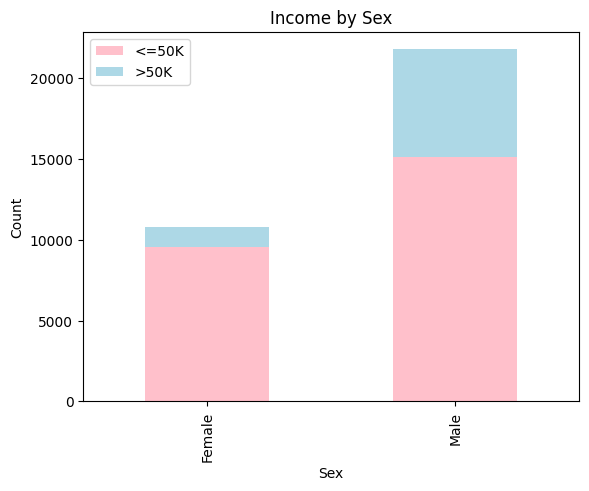

In [ ]:
grouped_data = df.groupby(['sex', 'income'])['income'].count().unstack()

# Create the stacked barplot
ax = grouped_data.plot(kind='bar', stacked=True, color=['#FFC0CB', '#ADD8E6'])

ax.set_title('Income by Sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.legend(['<=50K', '>50K'], loc='upper left')

plt.show()


### Income Distribution of Adults

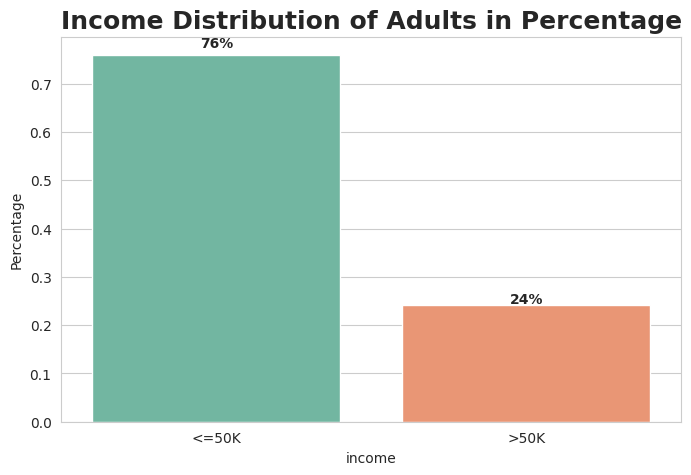

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults in Percentage', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Set2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

### Parallel coordinate plot

In [ ]:
import plotly.express as px
fig = px.parallel_coordinates(df, labels={},
        color_continuous_scale=px.colors.diverging.Tealrose,
        color_continuous_midpoint=2)
fig.show()

### Count Plot

Text(0, 0.5, 'Count')

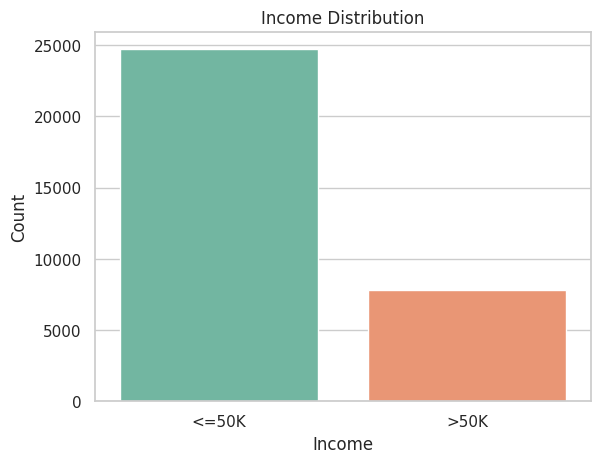

In [ ]:
sns.set(style="whitegrid")
# Create a count plot of income
sns.countplot(x="income", data=df, palette="Set2")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")

### Scatter Plot


Text(0, 0.5, 'Hours-per-Week')

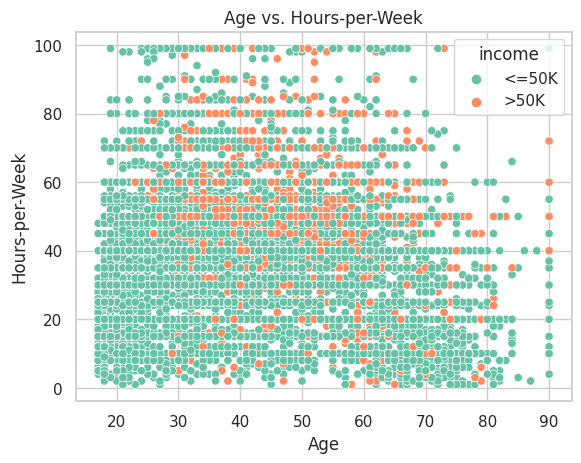

In [ ]:
sns.scatterplot(x="age", y="hours.per.week", hue="income", data=df, palette="Set2")
plt.title("Age vs. Hours-per-Week")
plt.xlabel("Age")
plt.ylabel("Hours-per-Week")

### Box plot Histogram in every column


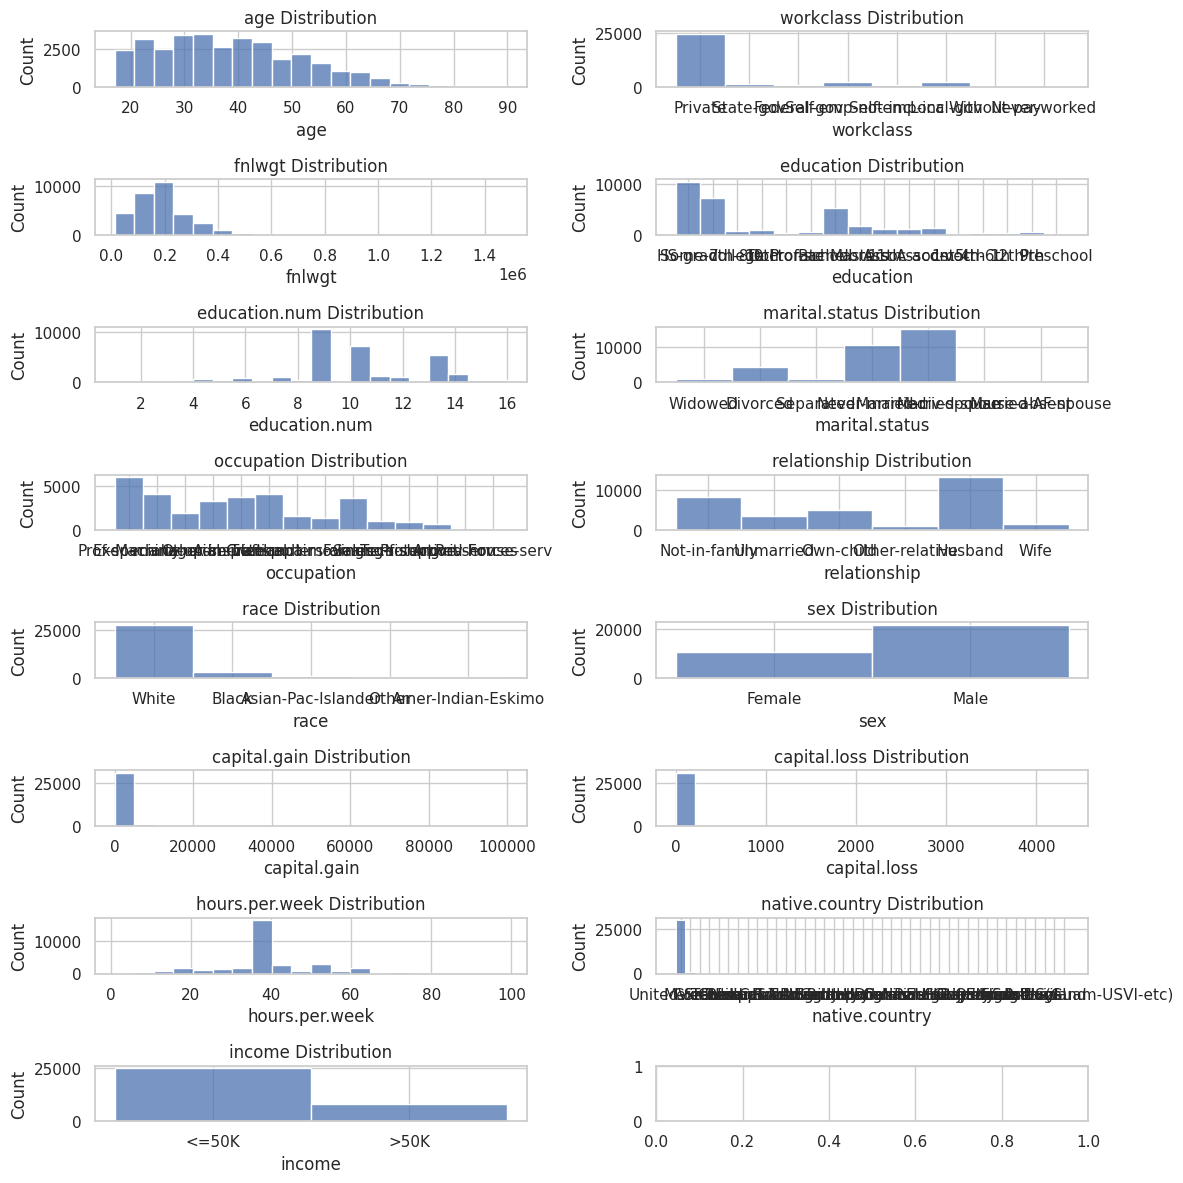

In [ ]:
n_rows = (len(df.columns) + 1) // 2
n_cols = 2

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 12))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(x=column, data=df, kde=False, bins=20, ax=axes[i])
    axes[i].set_title(f"{column} Distribution")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

### Histogram on only numerical columns

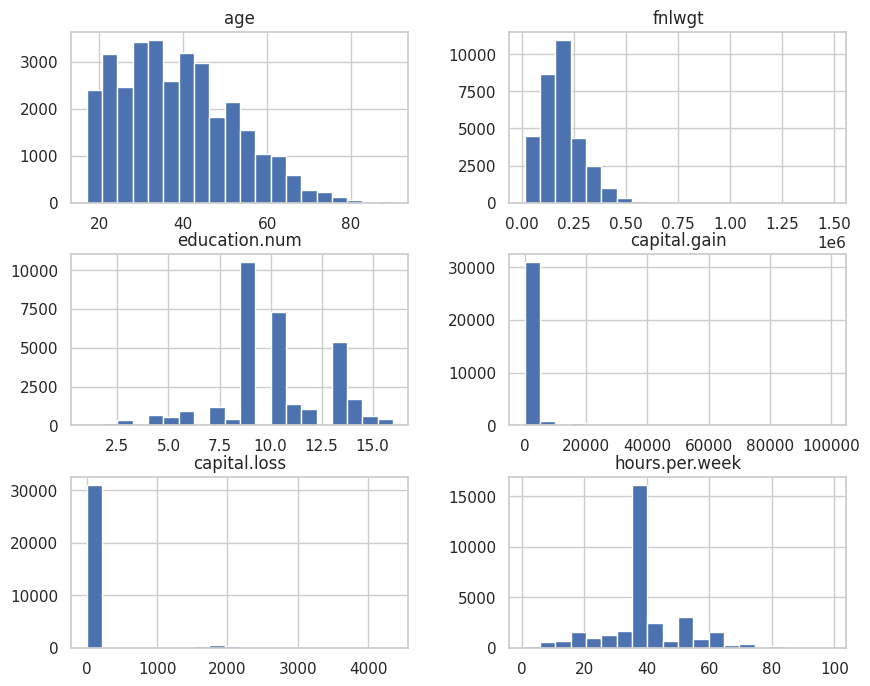

In [ ]:
df.hist(bins=20, figsize=(10, 8))
plt.show()

### Pie Chart


10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
HS-grad         10501
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
Name: education, dtype: int64


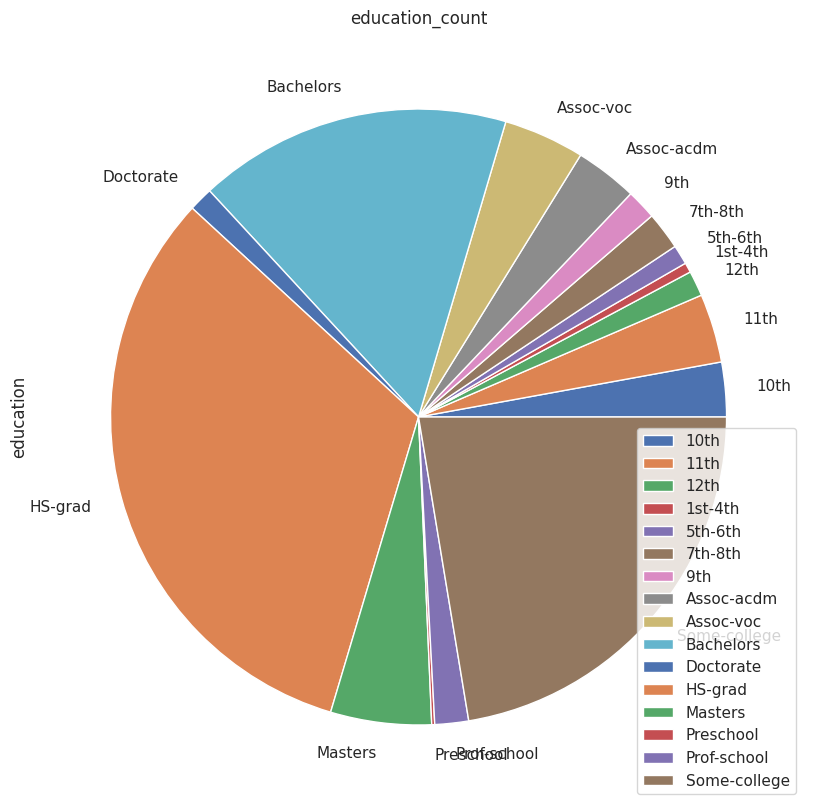

In [ ]:
counts=df['education'].value_counts().sort_index()
print(counts)
counts.plot(kind='pie',title='education_count',figsize=(11,10))
plt.legend()
plt.show()

### Violin plot

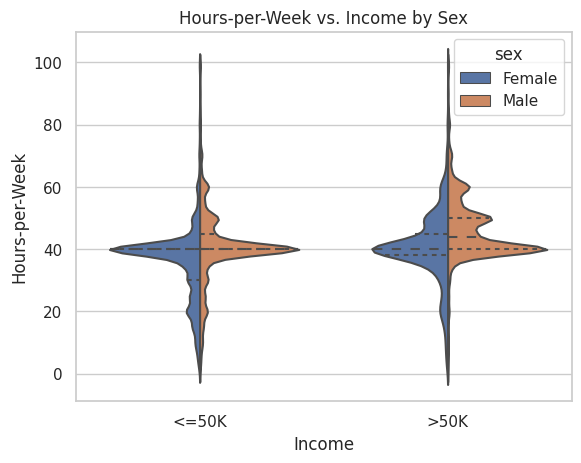

In [ ]:
sns.violinplot(x="income", y="hours.per.week", hue="sex", data=df, split=True, inner="quart")
plt.title("Hours-per-Week vs. Income by Sex")
plt.xlabel("Income")
plt.ylabel("Hours-per-Week")
plt.show()

### Heat map


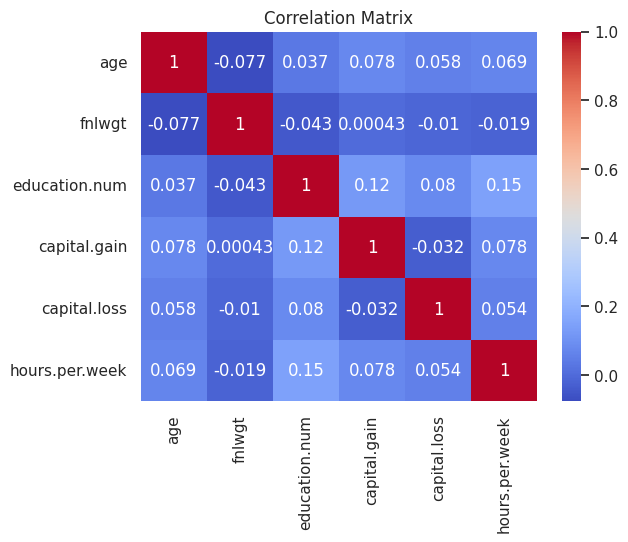

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
corr = numeric_columns.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

# Show the plot
plt.show()




```
# This is formatted as code
```

### Pair Plot

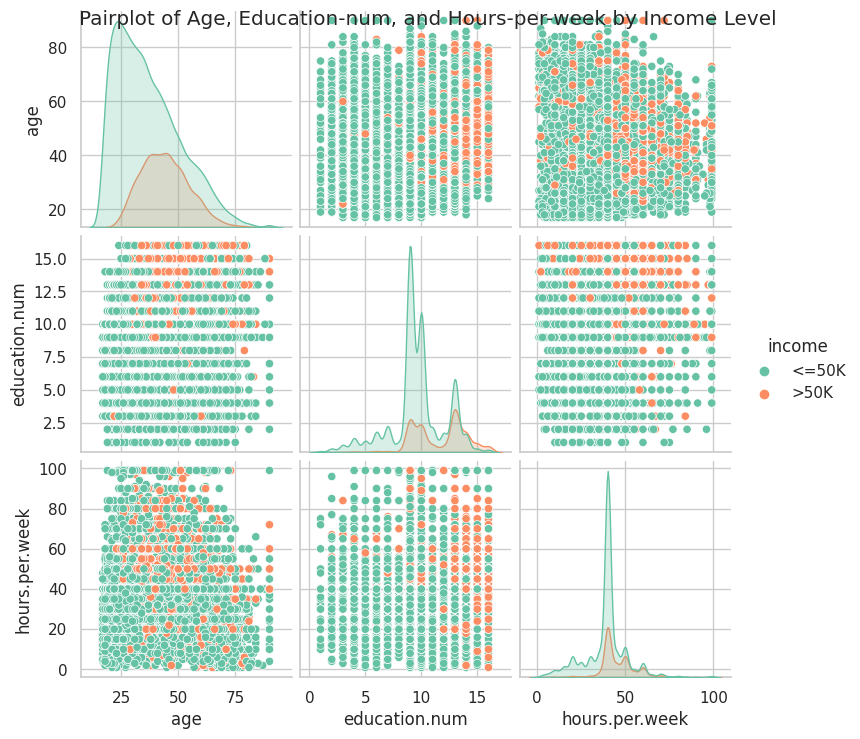

In [ ]:
sns.pairplot(df[['age', 'education.num', 'hours.per.week', 'income']], hue='income', palette="Set2")
plt.suptitle("Pairplot of Age, Education-num, and Hours-per-week by Income Level")
plt.show()

### Age Distribution by Income Level and Sex

Text(0, 0.5, 'Age')

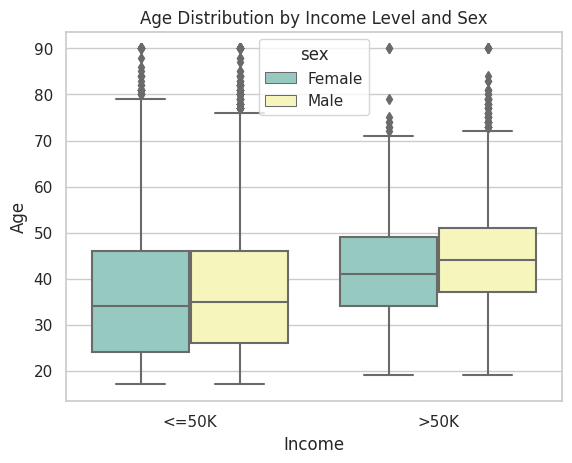

In [ ]:
sns.boxplot(x="income", y="age", hue="sex", data=df, palette="Set3")
plt.title("Age Distribution by Income Level and Sex")
plt.xlabel("Income")
plt.ylabel("Age")

### Age Distribution

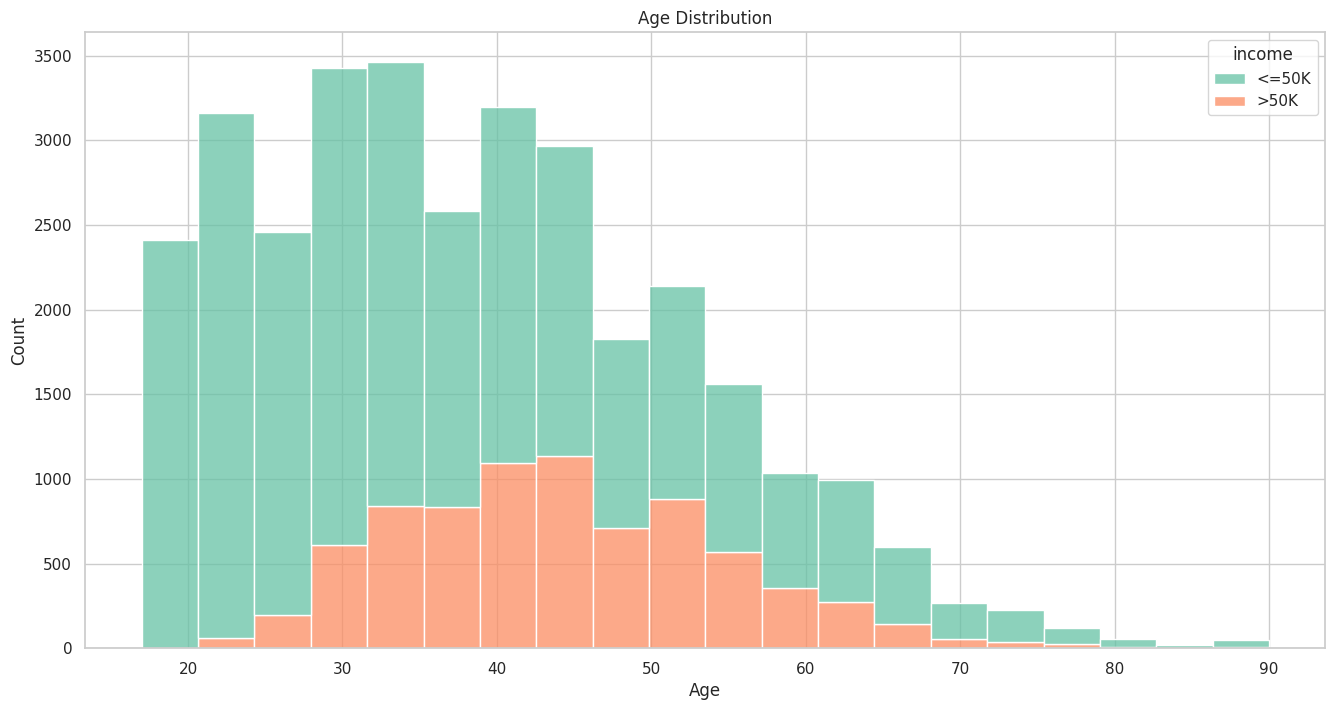

In [ ]:
# Age
plt.figure(figsize=(16, 8))
sns.set_palette("Set2")
sns.histplot(data=df, x='age', hue='income', bins=20, multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

<Axes: xlabel='education', ylabel='count'>

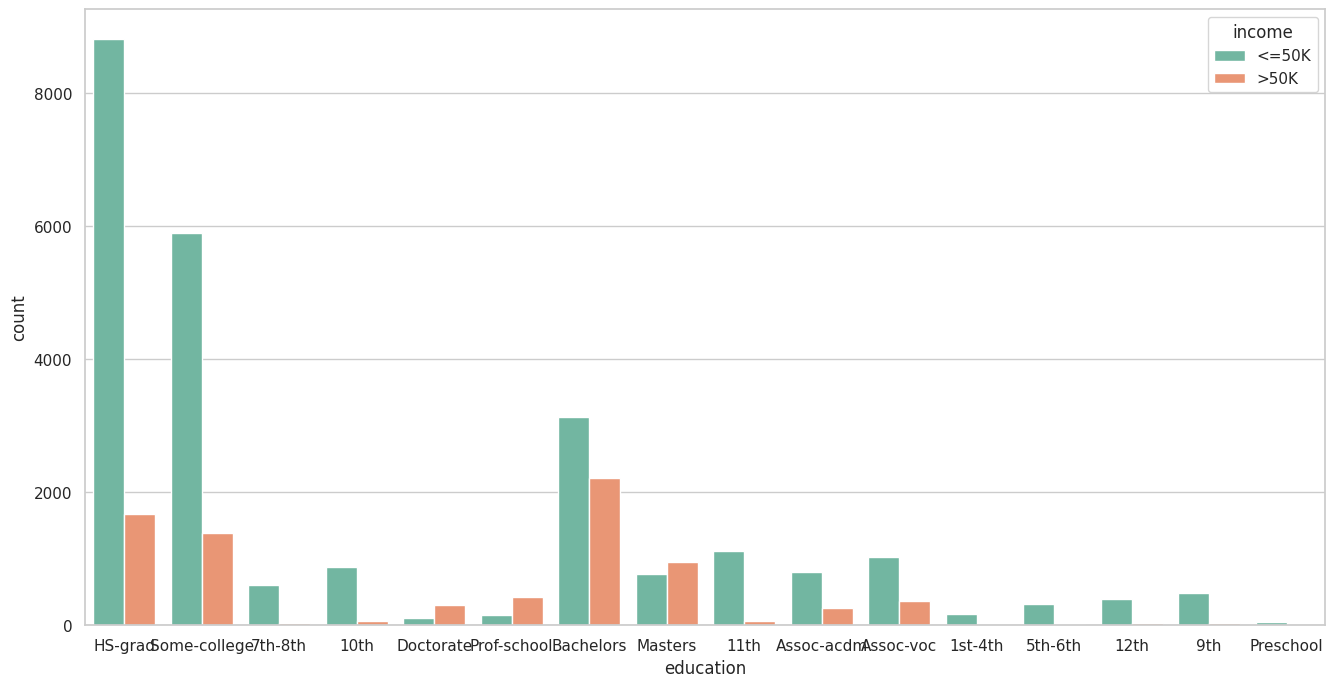

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(x='education', data=df, hue='income')

In [ ]:
# Education Number
df.groupby('education.num').size()

education.num
1        51
2       168
3       333
4       646
5       514
6       933
7      1175
8       433
9     10501
10     7291
11     1382
12     1067
13     5355
14     1723
15      576
16      413
dtype: int64

<Axes: xlabel='education.num', ylabel='count'>

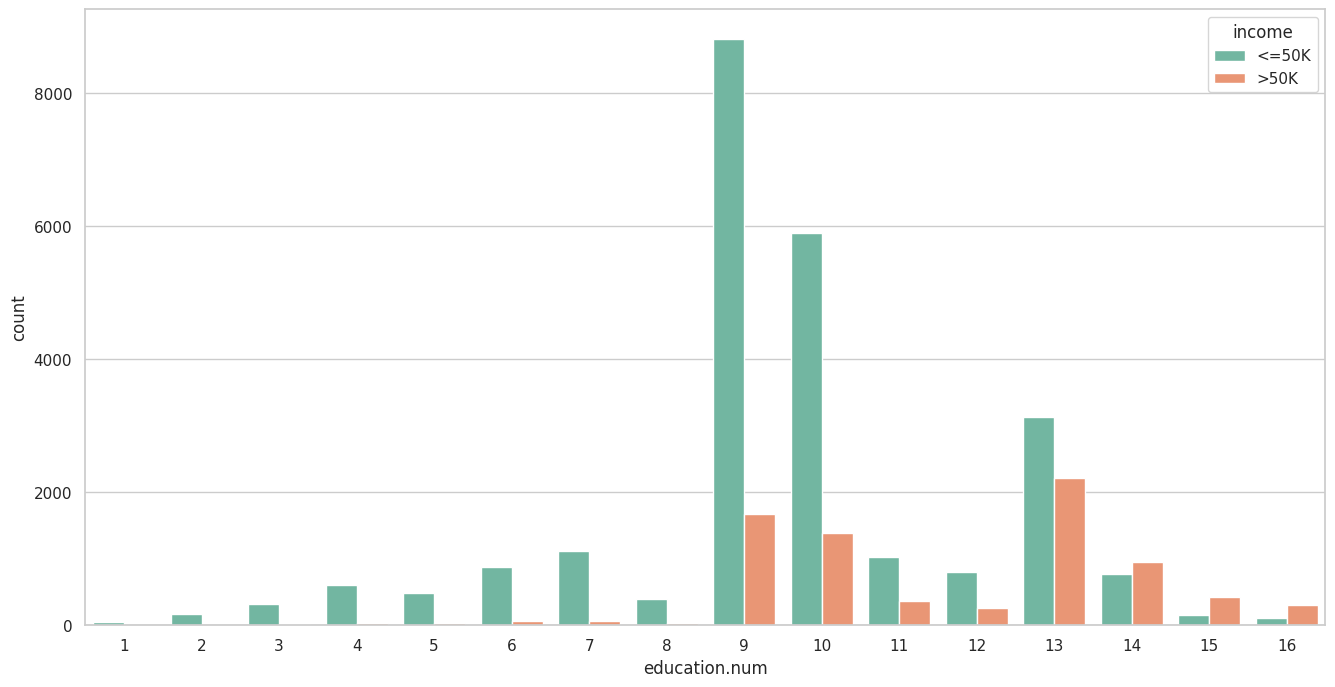

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(x='education.num', data=df, hue='income')

marital.status
Divorced                  4443
Married-AF-spouse           23
Married-civ-spouse       14976
Married-spouse-absent      418
Never-married            10683
Separated                 1025
Widowed                    993
dtype: int64


<Axes: xlabel='marital.status', ylabel='count'>

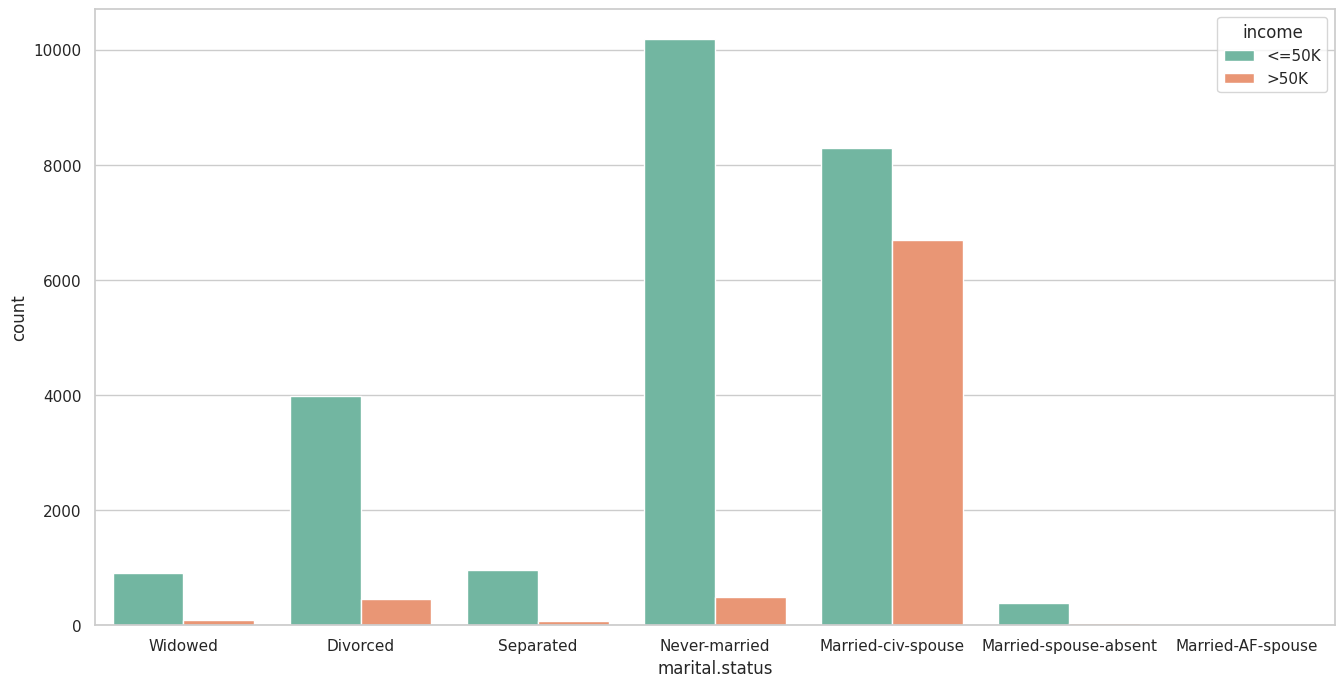

In [ ]:
# marital status
print(df.groupby('marital.status').size())
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='marital.status', hue='income')

occupation
Adm-clerical         3770
Armed-Forces            9
Craft-repair         4099
Exec-managerial      4066
Farming-fishing       994
Handlers-cleaners    1370
Machine-op-inspct    2002
Other-service        3295
Priv-house-serv       149
Prof-specialty       5983
Protective-serv       649
Sales                3650
Tech-support          928
Transport-moving     1597
dtype: int64


Text(0.5, 1.0, 'Occupation Distribution')

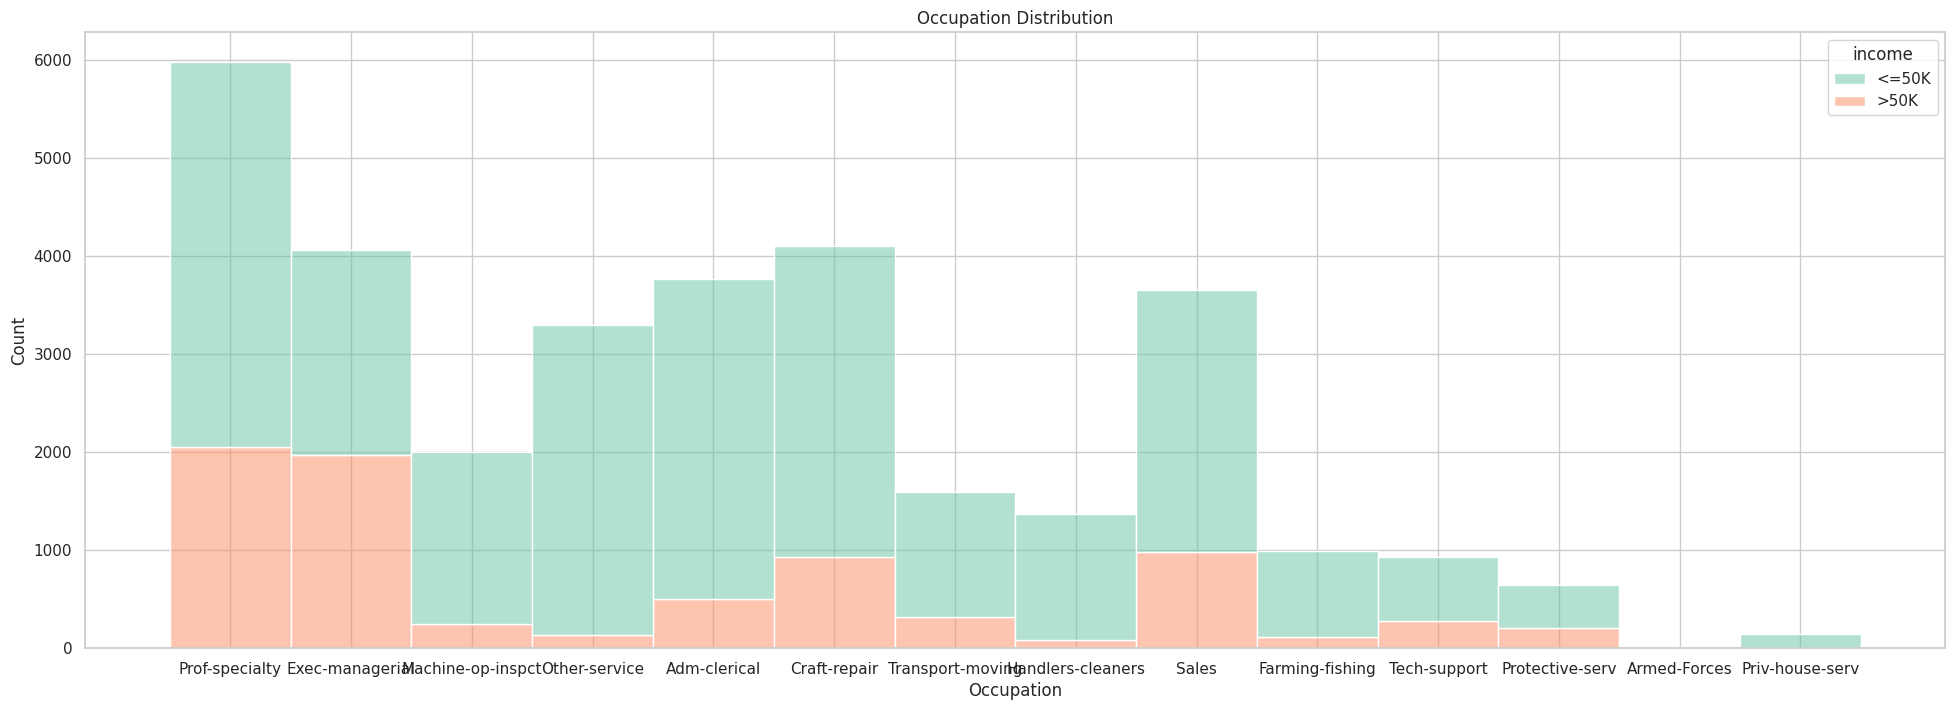

In [ ]:
plt.figure(figsize=(24, 8))

print(df.groupby('occupation').size())
sns.histplot(data=df, x='occupation', hue='income', multiple='stack', alpha=0.5)
plt.xlabel('Occupation')
plt.title('Occupation Distribution')

relationship
Husband           13193
Not-in-family      8305
Other-relative      981
Own-child          5068
Unmarried          3446
Wife               1568
dtype: int64


<Axes: xlabel='relationship', ylabel='Count'>

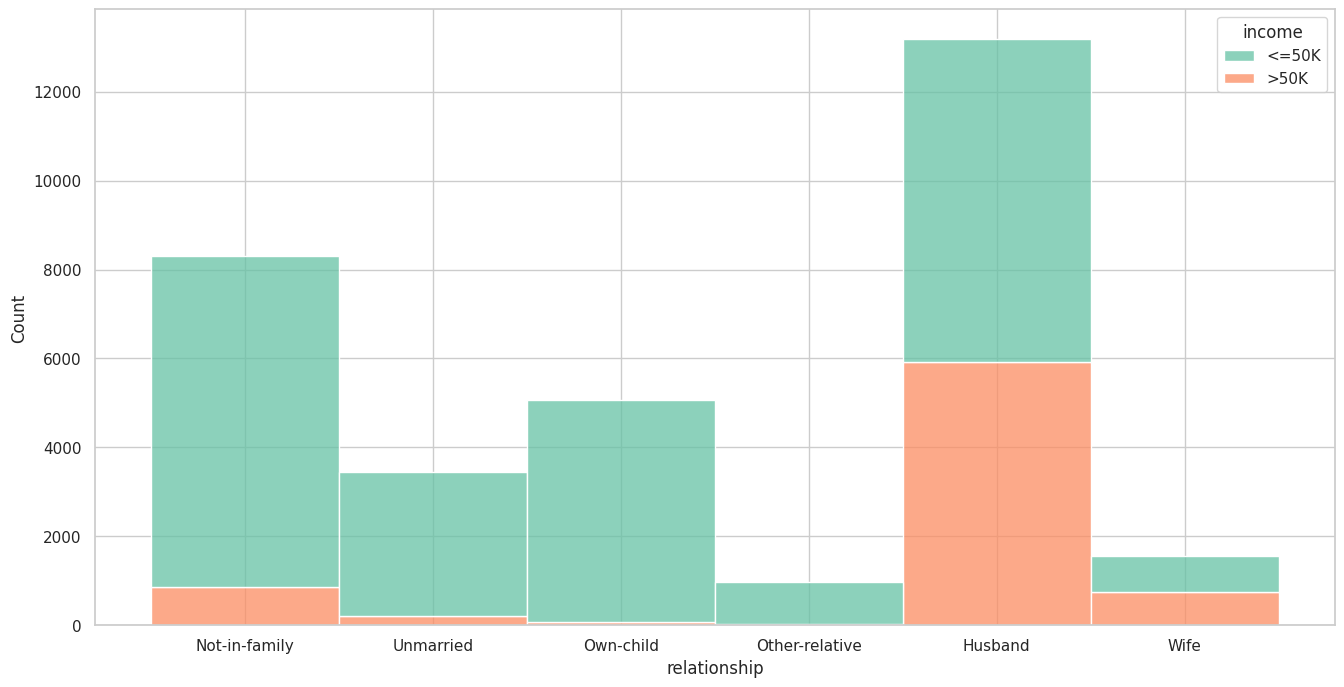

In [ ]:
# Relationship
print(df.groupby('relationship').size())
plt.figure(figsize=(16, 8))
sns.histplot(data=df, x='relationship', hue='income', multiple='stack')

race
Amer-Indian-Eskimo      311
Asian-Pac-Islander     1039
Black                  3124
Other                   271
White                 27816
dtype: int64


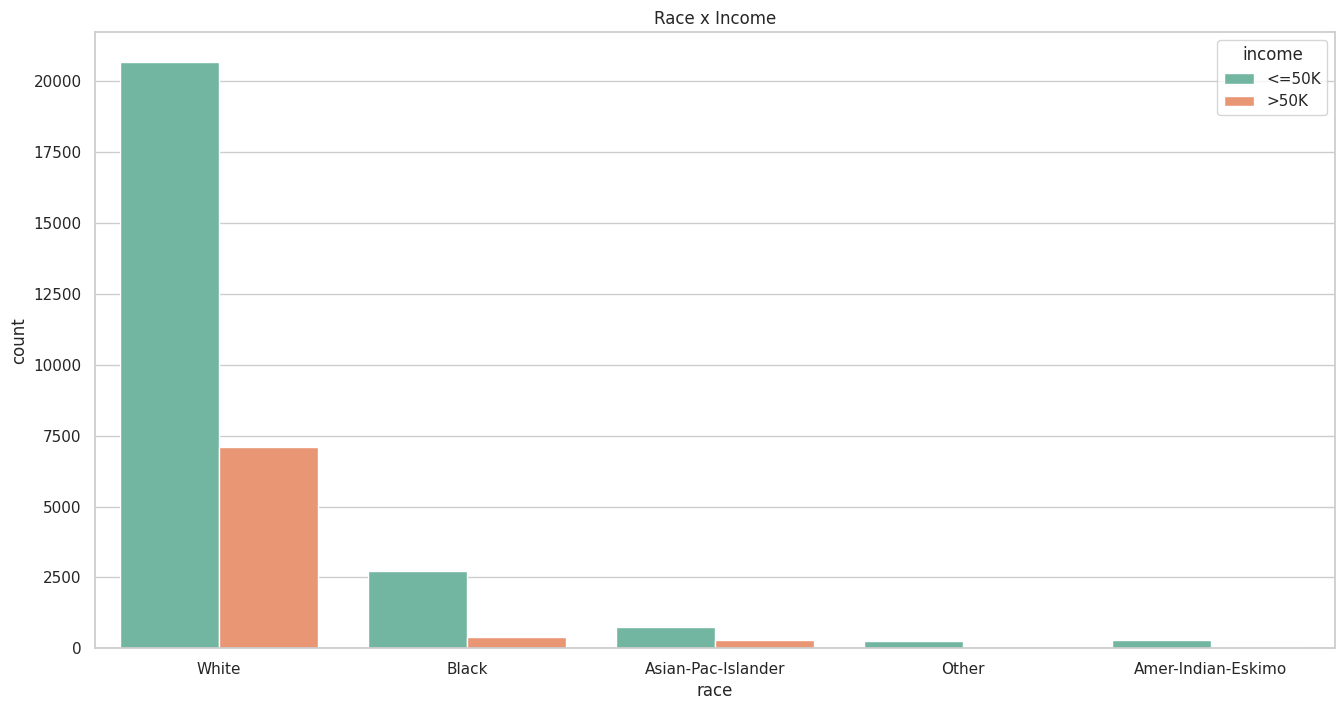

sex
Female    10771
Male      21790
dtype: int64


Text(0.5, 1.0, 'Sex x Income')

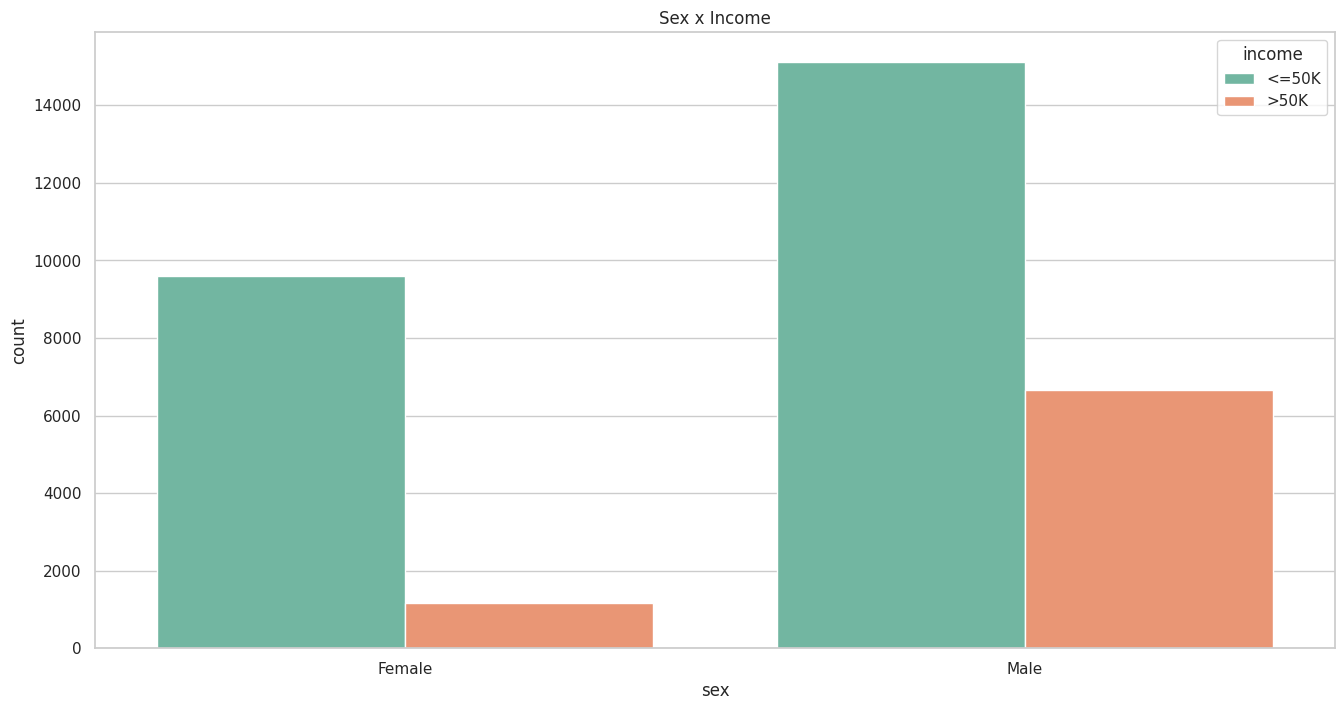

In [ ]:
# Race and Sex
plt.figure(figsize=(16, 8))
print(df.groupby(df.race).size())
sns.countplot(data=df, x='race', hue='income')
plt.title('Race x Income')
plt.show()
plt.figure(figsize=(16, 8))
print(df.groupby(df.sex).size())
sns.countplot(data=df, x='sex', hue='income')
plt.title('Sex x Income')



### Apply DP on Dataset (Epsilon = 0.01)

**DP** can be applied to any column of a dataset, but it is important to consider the following factors when choosing which columns to apply it


---


**Privacy sensitivity:** Some columns, such as age, race, and income, are more
sensitive than others. It is important to apply DP to these columns with a higher privacy budget, which will add more noise to the data and make it more difficult to identify individuals.


---


**Accuracy:** DP can reduce the accuracy of the data, so it is important to apply it to columns where accuracy is less important. For example, it may be less important to know the exact age of a person than it is to know their general age range.


---


**Utility:** DP can also reduce the utility of the data, so it is important to apply it to columns where the data will still be useful even after noise has been added. For example, it may still be useful to know the age range of a person even if the exact age is not known.


---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def apply_dp_laplace(df, epsilon, columns):
  noise = np.random.laplace(loc=0, scale=1.0 / epsilon, size=(df.shape[0], len(columns)))
  df_dp = df.copy()
  for i in range(len(columns)):
    df_dp[columns[i]] += noise[:, i]

  return df_dp

In [ ]:
# Define the columns to apply DP to (numeric columns)
columns = ["age", "capital.gain", "capital.loss", "hours.per.week"]

df_dp = apply_dp_laplace(df, epsilon=0.01, columns=columns)

In [ ]:
def visualize_data(df, dp_applied=False):

  # Create a histogram of the age distribution.
  plt.hist(df['age'], bins=100, edgecolor='black')
  plt.xlabel('Age')
  plt.ylabel('Count')
  plt.title('Age distribution (DP applied: {})'.format(dp_applied))
  plt.show()


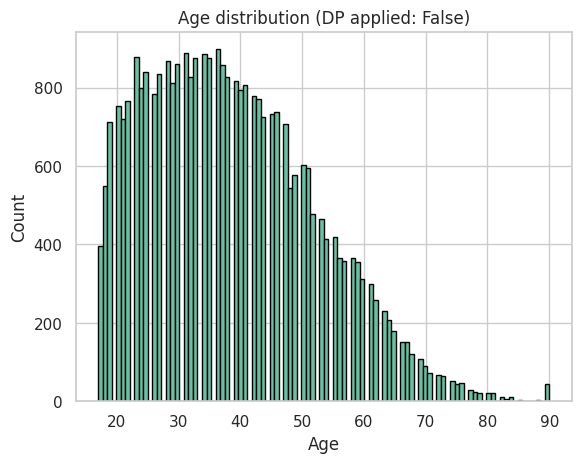

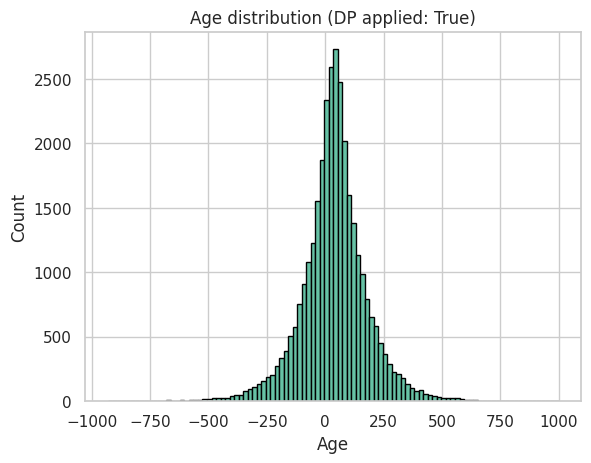

In [ ]:
visualize_data(df)
visualize_data(df_dp, dp_applied=True)

In [ ]:
# Metrices orignal
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
# Metrices DP Applied
df_dp.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.592657,142.466749,-930.355054,-32.249385,38.539546,110.424011,9.995414e+02
fnlwgt,32561.0,189778.366512,105549.977697,12285.000000,117827.000000,178356.000000,237051.000000,1.484705e+06
education.num,32561.0,10.080679,2.572720,1.000000,9.000000,10.000000,12.000000,1.600000e+01
capital.gain,32561.0,1077.648844,7385.292085,0.000000,0.000000,0.000000,0.000000,9.999900e+04
capital.loss,32561.0,87.303830,402.960219,0.000000,0.000000,0.000000,0.000000,4.356000e+03
hours.per.week,32561.0,40.437456,12.347429,1.000000,40.000000,40.000000,45.000000,9.900000e+01
